## Introduction
Customer Segmentation is a popular application of unsupervised learning. Using
clustering, identify segments of customers to target the potential user base. They divide
customers into groups according to common characteristics like gender, age, interests,
and spending habits so they can market to each group effectively.
Use K-means clustering and also visualize the gender and age distributions. Then
analyze their annual incomes and spending scores.

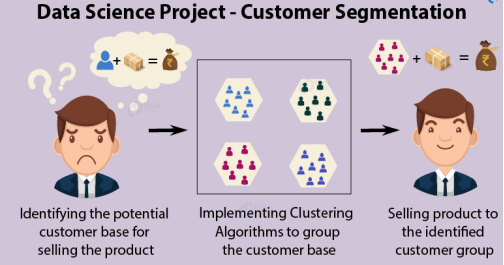

## Table of contents

#### 1. Importing the neccessary libraries
#### 2. Exploring Datasets with pandas
#### 3. Visualizing Data using Seaborn
#### 4. Scatter Plot Annual Income vs Spending Score
#### 5. Kmeans Clustering
#### 6. Clustering evaluation using Silhoutte Score
#### 7. 3d scatter plotting


### Importing the Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D 
from platform import python_version
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools

In [17]:
print('Pyhton version:',python_version())
print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)
print('Matplotlib version', mpl.__version__)
print('Seaborn version', sns.__version__)
print('Sklearn version', sk.__version__)

Pyhton version: 3.7.7
Pandas version 1.0.3
Numpy version 1.18.1
Matplotlib version 3.1.3
Seaborn version 0.10.1
Sklearn version 0.22.1


### Load the data

In [18]:
data=pd.read_csv('Mall_Customers.csv')

In [19]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
34,35,Female,49,33,14
182,183,Male,46,98,15
144,145,Male,25,77,12
32,33,Male,53,33,4
140,141,Female,57,75,5


In [21]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Customer ID is not relevent and already we have the index values so I'll drop that variable

In [23]:
data.drop(['CustomerID'],axis=1, inplace=True)

In [24]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Histograms for Age, Annual Income, Spending Score

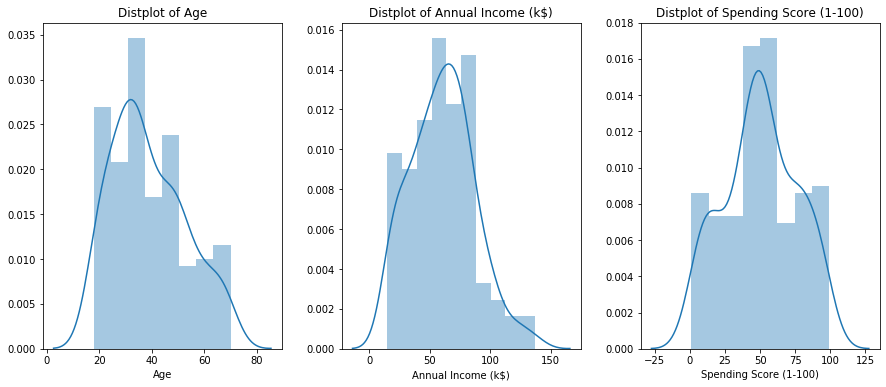

In [25]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3,n)
    plt.subplots_adjust(hspace =0.25 , wspace = 0.25)
    sns.distplot(data[x] )
    plt.title('Distplot of {}'.format(x))
plt.show()

### Distribution of Gender

In [26]:
dt=data['Gender'].value_counts()
dt

Female    112
Male       88
Name: Gender, dtype: int64

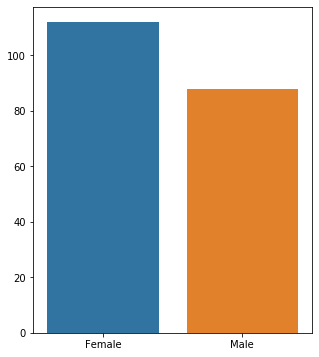

In [27]:
plt.figure(figsize=(5,6))
sns.barplot(data=data, x=dt.index, y=dt.values)
plt.show()

### From the above plot if you see, the count of Female customer are more than Male customers.

### Visualizing number of customers per Age Group

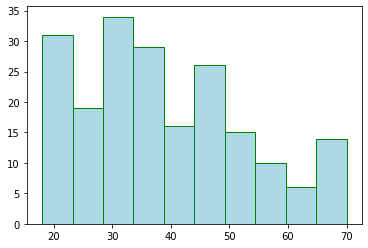

In [28]:
plt.hist(data.Age, edgecolor='green', color='lightblue')
plt.show()

In [29]:
x=pd.cut(data['Age'],5, labels = ['18-25', '26-35','36-45','46-55','55-80'])

In [30]:
age=x.value_counts()
age

26-35    63
18-25    50
36-45    42
46-55    25
55-80    20
Name: Age, dtype: int64

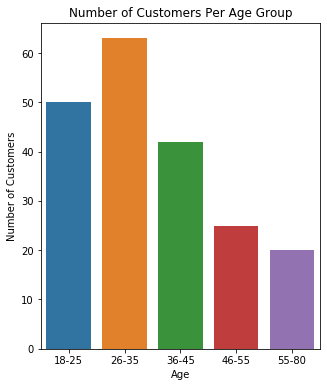

In [31]:
plt.figure(figsize=(5,6))
sns.barplot(data=data, x=age.index, y=age.values)
plt.xlabel("Age")
plt.ylabel('Number of Customers')
plt.title('Number of Customers Per Age Group')
plt.show()

### Visualizing Annual Income per Gender

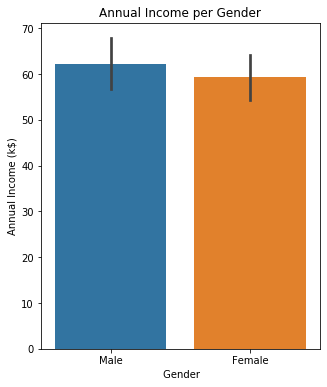

In [32]:
plt.figure(figsize=(5,6))
sns.barplot(data['Gender'],data['Annual Income (k$)'])
plt.xlabel(' Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income per Gender')
plt.show()

### The annual income of male is more than a female

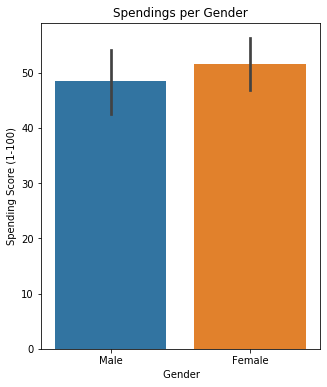

In [33]:
plt.figure(figsize=(5,6))
sns.barplot(data['Gender'],data['Spending Score (1-100)'])
plt.xlabel(' Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Spendings per Gender')
plt.show()

### Visualizing Spending Score per age group


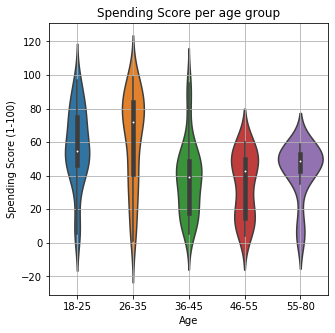

In [34]:
plt.figure(figsize=(5,5))
sns.violinplot(x, data['Spending Score (1-100)'])
plt.title('Spending Score per age group')
plt.grid(True)
plt.show()

### Visualizing Annula Income per age group

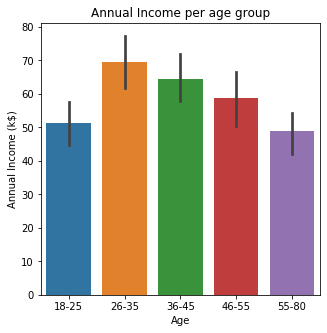

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(x, data['Annual Income (k$)'])
plt.title('Annual Income per age group')
plt.show()

### Visualizing Spending Score

In [36]:
Spendingsgrp=pd.cut(data['Spending Score (1-100)'],3, labels = ['0-33', '34-66','67-100'])
Spendingsgrp

0       34-66
1      67-100
2        0-33
3      67-100
4       34-66
        ...  
195    67-100
196      0-33
197    67-100
198      0-33
199    67-100
Name: Spending Score (1-100), Length: 200, dtype: category
Categories (3, object): [0-33 < 34-66 < 67-100]

In [37]:
spend=Spendingsgrp.value_counts()

In [38]:
spend

34-66     94
67-100    57
0-33      49
Name: Spending Score (1-100), dtype: int64

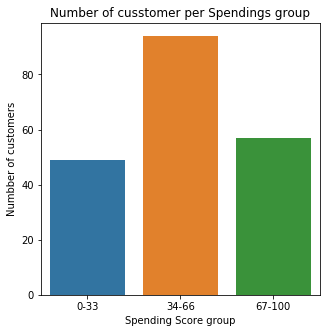

In [39]:
plt.figure(figsize=(5,5))
sns.barplot(x=spend.index, y=spend.values)
plt.title('Number of cusstomer per Spendings group')
plt.xlabel('Spending Score group')
plt.ylabel('Numbber of customers')
plt.show()

### Visualizing Annual Income

In [40]:
Incgrp=pd.cut(data['Annual Income (k$)'],5, labels = ['0-30', '31-60','61-90','91-120','121+'])
income=Incgrp.value_counts()

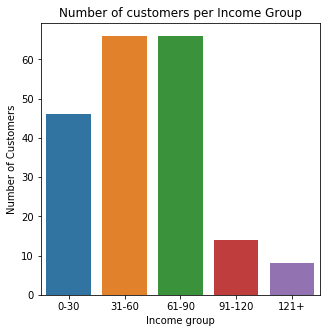

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(x=income.index, y=income.values)
plt.title('Number of customers per Income Group')
plt.xlabel('Income group')
plt.ylabel('Number of Customers')
plt.show()

###  Visualizing Annual Income per Age w.r.t Gender

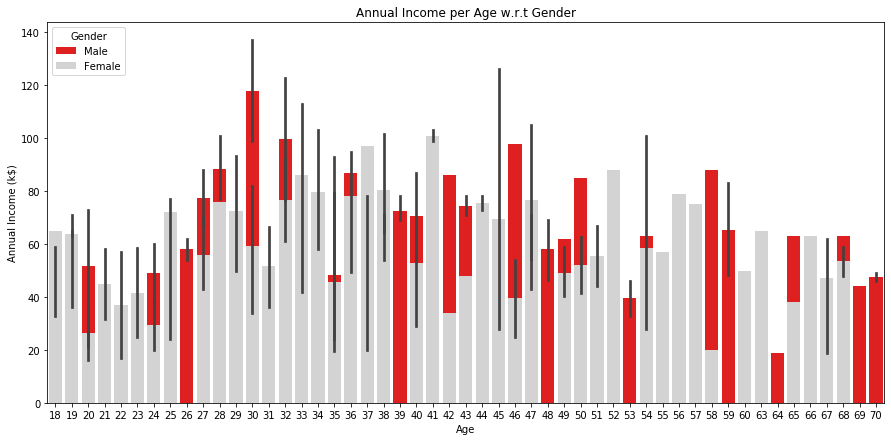

In [42]:
plt.figure(figsize=(15,7))

sns.barplot(data=data, x='Age', y='Annual Income (k$)', hue='Gender',  dodge=False, palette=['red','lightgray'])
plt.title('Annual Income per Age w.r.t Gender')
plt.show()

### Visualizing Age vs Spending Score w.r.t Gender

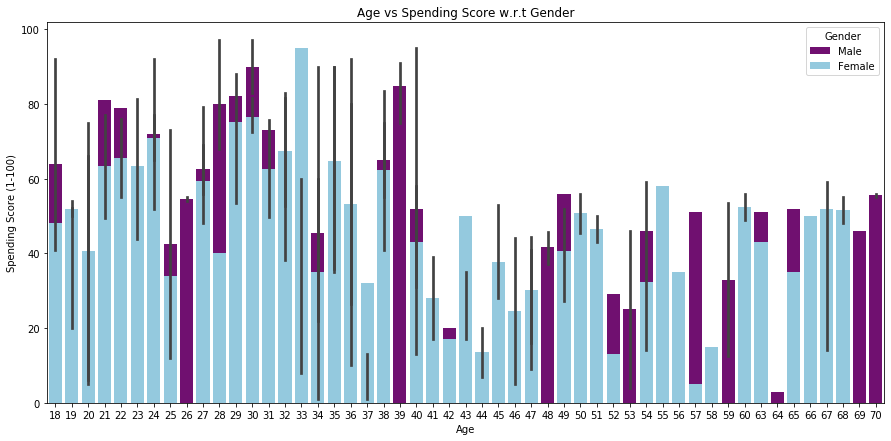

In [44]:
plt.figure(figsize=(15,7))
sns.barplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender', dodge=False, palette=['purple','skyblue'])
plt.title('Age vs Spending Score w.r.t Gender')
plt.show()

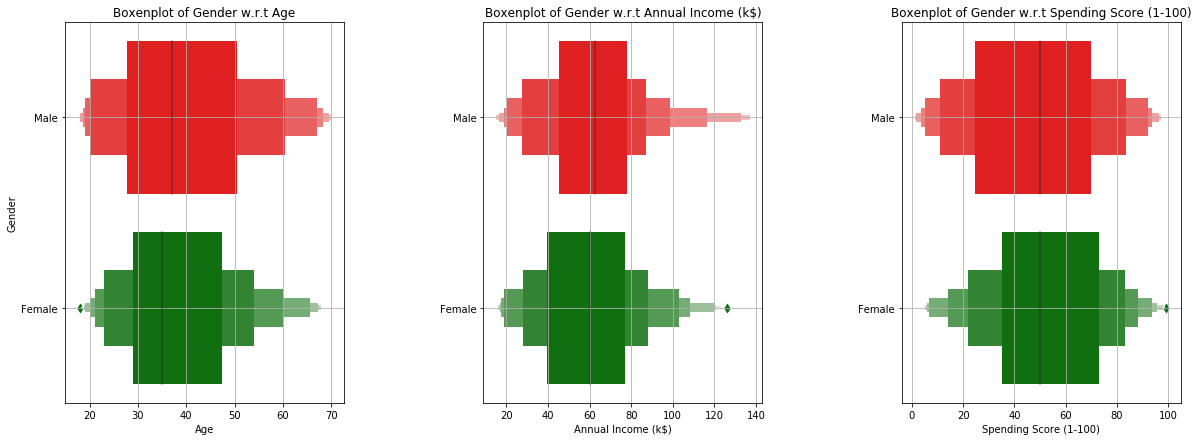

In [45]:
plt.figure(1 , figsize = (20 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxenplot(x = cols , y = 'Gender' , data = data, palette=['red','green'])
    plt.grid(True)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxenplot of Gender w.r.t {}'.format(cols))
plt.show()

### Kmeans is not possible to define euclidian distance between categorical values, so we drop Gender variables

In [46]:
data=data.drop('Gender', axis=1)
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## Kmeans Clustering

In [47]:
x=data.copy()
km = KMeans(n_clusters=3, random_state=1)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [48]:
km.inertia_

143342.751571706

In [49]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [50]:
x['cluster_3'] = km.labels_
x.sort_values('cluster_3')

,Age,Annual Income (k$),Spending Score (1-100),cluster_3
198,32,137,18,0
174,52,88,13,0
172,36,87,10,0
136,44,73,7,0
170,40,87,13,0
...,...,...,...,...
69,32,48,47,2
70,70,49,55,2
71,47,49,42,2
73,60,50,56,2


In [51]:
x.cluster_3.value_counts()

2    123
1     39
0     38
Name: cluster_3, dtype: int64

In [52]:
centers = x.groupby('cluster_3').mean()

In [53]:
centers

,Age,Annual Income (k$),Spending Score (1-100)
cluster_3,,,
0,40.394737,87.000000,18.631579
1,32.692308,86.538462,82.128205
2,40.325203,44.154472,49.829268


In [54]:
km.cluster_centers_

array([[40.39473684, 87.        , 18.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [40.32520325, 44.15447154, 49.82926829]])

In [56]:
print('silhouette_score for cluster_3:',metrics.silhouette_score(x, km.labels_))

silhouette_score for cluster_3: 0.3842499551758728


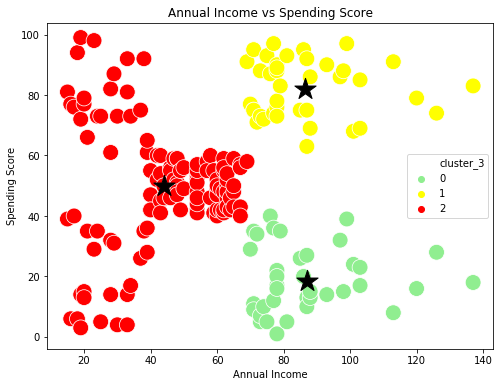

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=x,x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_3', s=250, palette=['lightgreen','yellow','red'])

# cluster centers, marked by "+"
plt.scatter(x=centers['Annual Income (k$)'], y=centers['Spending Score (1-100)'], marker='*', s=500, c='black')

# add labels
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Clustering evaluation using Silhoutte Score

In [58]:
x

,Age,Annual Income (k$),Spending Score (1-100),cluster_3
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,0
197,32,126,74,1
198,32,137,18,0


### Now I'm taking k value as 5, and applying Kmeans only to spending score and annual income

In [59]:
x=x[['Annual Income (k$)','Spending Score (1-100)']]
kmeans_new= KMeans(5)
kmeans_new.fit(x)
cluster_new= x.copy()
cluster_new['cluster_5']=kmeans_new.fit_predict(x)
cluster_new
labels = km.labels_

In [60]:
centers1 = cluster_new.groupby('cluster_5').mean()
centers1

,Annual Income (k$),Spending Score (1-100)
cluster_5,,
0,26.304348,20.913043
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,88.200000,17.114286


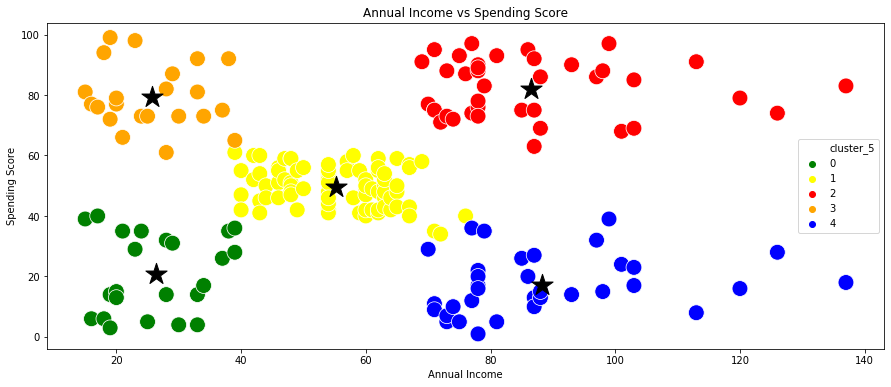

In [61]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=cluster_new,x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_5', s=250, palette=['green','yellow','red','orange','blue'])

# cluster centers, marked by "+"
plt.scatter(x=centers1['Annual Income (k$)'], y=centers1['Spending Score (1-100)'], marker='*', s=500, c='black')

# add labels
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Calculating K value usig silhoutte Score

In [62]:
x1=data.copy()
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(x1)
    scores.append(metrics.silhouette_score(x1, km.labels_))

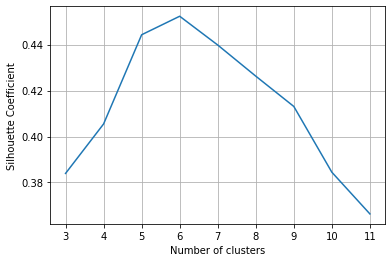

In [63]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### From the above plot we found that K value has the highest Silhouette coefficient, So We take K value as 6.

In [64]:

kmeans_new= KMeans(6)
kmeans_new.fit(x1)
cluster_final= x1.copy()
cluster_final['cluster_6']=kmeans_new.fit_predict(x1)
cluster_final

cluster_final

,Age,Annual Income (k$),Spending Score (1-100),cluster_6
0,19,15,39,5
1,21,15,81,3
2,20,16,6,5
3,23,16,77,3
4,31,17,40,5
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2


In [65]:
centers2 = cluster_final.groupby('cluster_6').mean()
centers2

,Age,Annual Income (k$),Spending Score (1-100)
cluster_6,,,
0,32.692308,86.538462,82.128205
1,27.000000,56.657895,49.131579
2,41.685714,88.228571,17.285714
3,25.272727,25.727273,79.363636
4,56.155556,53.377778,49.088889
5,44.142857,25.142857,19.523810


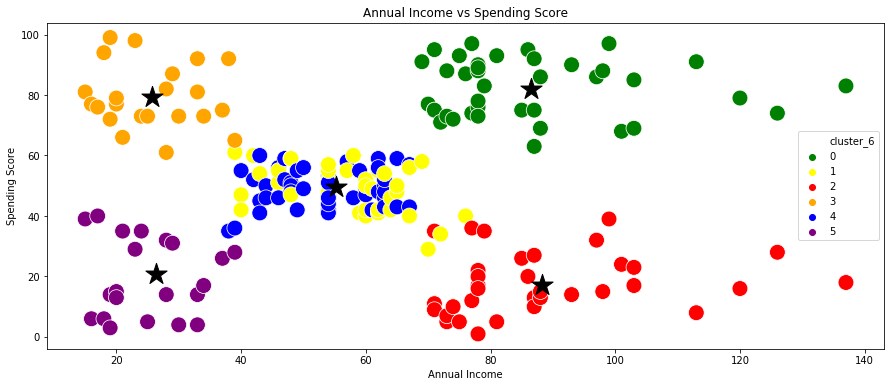

In [66]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=cluster_final,x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_6', s=250, palette=['green','yellow','red','orange','blue','purple'])

# cluster centers, marked by "+"
plt.scatter(x=centers1['Annual Income (k$)'], y=centers1['Spending Score (1-100)'], marker='*', s=500, c='black')

# add labels
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### If we notice the above plot the clusters are looking distracted, it's because the above plot is 2d, to get correct view we need to show in 3d plot

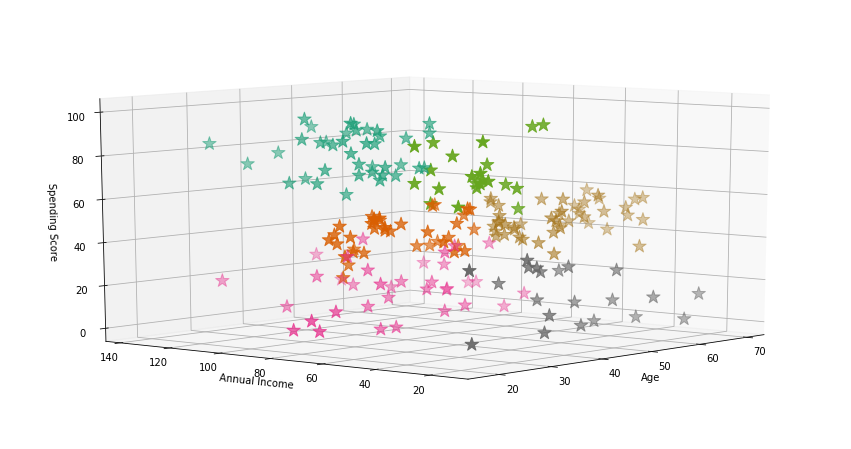

In [67]:
fig=plt.figure(figsize=(15,8))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(cluster_final['Age'],
           cluster_final['Annual Income (k$)'],
           cluster_final['Spending Score (1-100)'],
           c=cluster_final['cluster_6'], 
           marker='*', 
           s=200,
           cmap='Dark2' )

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.view_init( elev=10, azim=220)

plt.show()

### The above plot is a 3d scatter plot where we can't find which marker is defined to which varaible. So, in that case I came up with "iplot" which is interactive plot where you can hover onthe marker and it shows the information with the variables by using a line.

In [73]:

ipl = go.Scatter3d(
    x= cluster_final['Age'],
    y= cluster_final['Spending Score (1-100)'],
    z= cluster_final['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = cluster_final['cluster_6'], 
        size= 5,
        line=dict(
            color= cluster_final['cluster_6'],
            width= 15
        ),
        opacity=0.8
         
     )
)
cluster_final1 = [ipl]

layout = go.Layout(
    title = 'Age vs Spending Amount vs Annual Income',
    margin=dict(l=0,r=50,b=0,t=100),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = cluster_final1, layout = layout)
py.iplot(fig)

### iplot is interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots. They let you have a lot of control over how these plots look and they let you zoom, show information on hover and toggle data to be viewed on the chart.